In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/train_revised.csv")

In [3]:
dataset = pd.read_csv('//train_revised.csv')
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49


In [4]:
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-2018,08:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-2018,08:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-2018,08:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-2018,07:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-2017,05:10,Kisii,Nairobi,Bus,49


In [5]:
dataset.shape

(51645, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
dataset.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-2017,07:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [8]:
dataset.isnull().sum()

,0
ride_id,0
seat_number,0
payment_method,0
payment_receipt,0
travel_date,0
travel_time,0
travel_from,0
travel_to,0
car_type,0
max_capacity,0


In [9]:
len(dataset['ride_id'].unique())

6249

In [10]:
label=dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [11]:
dataset=dataset.drop_duplicates("ride_id")

In [12]:
dataset.shape

(6249, 10)

In [13]:
dataset = dataset.merge(label, how="left",on="ride_id")
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [14]:
dataset = dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
dataset.drop(["travel_to"],axis=1,inplace=True)

In [17]:
#concatinate travel date and travel time column and make a new feature called date.
dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]

In [18]:
def  time_features(df):

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated
  dataset'''

  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute

  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )  # A lambda function that find if a day is weekend
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [23]:
def  time_features(df):

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated
  dataset'''

  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  # Use isocalendar().week to get the week of year
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.isocalendar().week.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute

  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )  # A lambda function that find if a day is weekend
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [24]:
dataset = time_features(dataset) # Call the time_features function with 'dataset' as an argument
dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-2017,07:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-2017,07:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-2017,07:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-2017,07:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-2017,07:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [26]:
dataset["travel_time"] = dataset["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
# You probably intended to use the variable 'dataset' instead of 'dataset_new'.

In [30]:
!pip install numpy
import numpy as np # Import the NumPy library and assign it to the alias 'np'

dataset['period'] = np.nan # Use 'dataset' instead of 'dataset_new'

dataset.loc[dataset.travel_time < 7, 'period'] = 'em'
dataset.loc[(dataset.travel_time >= 7) & (dataset.travel_time < 11), 'period'] = 'am'
dataset.loc[(dataset.travel_time >= 11) & (dataset.travel_time < 15), 'period'] = 'mid'
dataset.loc[(dataset.travel_time >= 15) & (dataset.travel_time < 19), 'period'] = 'eve'
dataset.loc[(dataset.travel_time >= 19) & (dataset.travel_time <= 24), 'period'] = 'pm'


pcount = dict(dataset['period'].value_counts()) # Use 'dataset' instead of 'dataset_new'
pcount


dataset['hourly_travelers'] = np.log1p(dataset['period'].map(pcount)) # Use 'dataset' instead of 'dataset_new'



dcount = dict(dataset["day_of_year"].value_counts()) # Use 'dataset' instead of 'dataset_new'
dataset["daily_travelers"] = np.log1p(dataset["day_of_year"].map(dcount)) # Use 'dataset' instead of 'dataset_new'
dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-2017,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-2017,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-2017,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-2017,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-2017,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [32]:
dataset.columns # Use 'dataset' instead of 'dataset_new'

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [33]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [35]:
transport_dataset = dataset.copy() # Use 'dataset' instead of 'dataset_new'

In [36]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-2017,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-2017,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-2017,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-2017,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-2017,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [37]:
transport_dataset.shape

(6249, 21)

In [38]:
transport_dataset.month.value_counts()

,count
month,
2,1503
12,1484
3,1353
1,952
4,803
11,153
10,1


In [39]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)


In [40]:
transport_dataset.month.value_counts()

,count
month,
1,3939
3,1354
2,956


In [41]:
transport_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13, 12, 11, 28, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1, 31, 30, 29, 25, 24, 23, 22, 21],
      dtype=int32)

In [42]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [43]:
transport_dataset['day_of_month'].value_counts()

,count
day_of_month,
2,2249
3,1448
1,841
9,262
11,261
7,254
8,251
10,246
6,225


In [44]:
transport_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-2017,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-2017,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-2017,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-2017,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-2017,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [48]:
# function to find the characterstics of the variable in the dataframe.
def data_characterization(df):
  '''This function takes dataframe as an argument and returns
    the characterstics of the features of the dataframe'''
  characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
  for col in df.columns:
    try:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()),
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':df[col].max(),	'Min':df[col].min(),'Mean':df[col].mean(),'std':df[col].std()},
                                                ignore_index=True)
    except:
      characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()),
                                                  'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
                                                  'Unique values':df[col].unique(),	'Max':np.nan,	'Min':np.nan,'Mean':np.nan,'std':np.nan},
                                                ignore_index=True)
  return characterized_df

In [51]:
!pip install pandas
import pandas as pd
import numpy as np
# function to find the characterstics of the variable in the dataframe.
def data_characterization(df):
  '''This function takes dataframe as an argument and returns
    the characterstics of the features of the dataframe'''
  characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
  for col in df.columns:
    try:
      # Instead of append, use concat to add a new row to the dataframe
      characterized_df = pd.concat([characterized_df, pd.DataFrame({'Columns name': [col],	'Type': [df[col].dtype], 'unique values Count': [len(df[col].unique())],
                                                  'Count Nan values': [df[col].isnull().sum()], 'Ratio Nan values': [df[col].isnull().sum()/df[col].shape[0]],
                                                  'Unique values': [df[col].unique()],	'Max': [df[col].max()],	'Min': [df[col].min()], 'Mean': [df[col].mean()], 'std': [df[col].std()]})], ignore_index=True)
    except:
       characterized_df = pd.concat([characterized_df, pd.DataFrame({'Columns name': [col],	'Type': [df[col].dtype], 'unique values Count': [len(df[col].unique())],
                                                  'Count Nan values': [df[col].isnull().sum()], 'Ratio Nan values': [df[col].isnull().sum()/df[col].shape[0]],
                                                  'Unique values': [df[col].unique()],	'Max': [np.nan],	'Min': [np.nan], 'Mean': [np.nan], 'std': [np.nan]})], ignore_index=True)
  return characterized_df

In [52]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["diff_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["diff_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["diff_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["diff_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["diff_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["diff_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["diff_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  fea=['diff_btw_0_1_next_bus', 'diff_btw_0_1_previous_bus', 'diff_btw_0_2_next_bus', 'diff_btw_0_2_previous_bus',
      'diff_btw_0_3_next_bus', 'diff_btw_0_3_previous_bus',
      'diff_btw_next_previous_bus']
  data[fea]=data.groupby(["travel_from"])[fea].fillna(method="ffill")
  data[fea]=data.groupby(["travel_from"])[fea].fillna(method="backfill")

  for i in [1,3,5,7,10,15] :
      data["count_trip_per_{}min_travel_from".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i)),"travel_from"]).ride_id.transform("count")
      data["count_trip_per_{}min".format(str(i))]=data.groupby([pd.Grouper(key="date",freq='{}min'.format(i))]).ride_id.transform("count")

  return data

In [53]:
data = find_difference_bw_bus(transport_dataset)

In [54]:
data_characterization(data)

,Columns name,Type,unique values Count,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean,std
0,ride_id,int64,6249,0,0.00000,"[6654, 8381, 8380, 8397, 8409, 8455, 8449, 849...",20117,1442,9963.644583,2296.304872
1,travel_date,object,149,0,0.00000,"[05-12-2017, 07-01-2018, 08-01-2018, 09-01-201...",NaN,NaN,NaN,NaN
2,travel_time,float64,78,0,0.00000,"[7.133333333333334, 7.25, 7.2, 7.0, 7.21666666...",23.166667,5.0,8.239828,2.951814
3,travel_from,object,17,0,0.00000,"[Awendo, Homa Bay, Kehancha, Kendu Bay, Keroka...",NaN,NaN,NaN,NaN
4,car_type,object,2,0,0.00000,"[Bus, shuttle]",NaN,NaN,NaN,NaN
5,max_capacity,int64,2,0,0.00000,"[49, 11]",49,11,30.392223,18.997471
6,number_of_ticket,int64,50,0,0.00000,"[2, 7, 1, 5, 3, 11, 4, 9, 12, 20, 6, 8, 17, 18...",50,1,8.264522,8.632968
7,date,datetime64[ns],4579,0,0.00000,"[2017-12-05 07:08:00, 2018-01-07 07:08:00, 201...",2018-04-20 23:10:00,2017-10-17 07:15:00,2018-02-06 22:40:22.285165568,41 days 23:04:09.579157454
8,day_of_week,int32,7,0,0.00000,"[1, 6, 0, 2, 3, 4, 5]",6,0,2.971355,1.956386
9,day_of_year,int32,149,0,0.00000,"[339, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...",365,1,133.275884,129.457515


In [55]:
data.dropna(inplace=True)

In [56]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,count_trip_per_3min_travel_from,count_trip_per_3min,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min
502,6654,05-12-2017,7.133333,Awendo,Bus,49,2,2017-12-05 07:08:00,1,339,...,1,7,1,11,1,9,1,16,1,21
1862,8381,07-01-2018,7.133333,Awendo,Bus,49,7,2018-01-07 07:08:00,6,7,...,1,4,1,7,1,10,1,11,1,12
1861,8380,07-01-2018,7.250000,Awendo,Bus,49,1,2018-01-07 07:15:00,6,7,...,1,2,1,2,1,3,1,3,1,2
1874,8397,08-01-2018,7.133333,Awendo,Bus,49,5,2018-01-08 07:08:00,0,8,...,1,5,1,8,1,9,1,11,1,12
1886,8409,08-01-2018,7.250000,Awendo,Bus,49,3,2018-01-08 07:15:00,0,8,...,1,2,1,2,1,2,1,3,1,2


In [57]:
from datetime import datetime
from datetime import timedelta

In [58]:
# The list of hollydays in Nirobi

# The  main goal of this chunk of the code is to find that there is holiday at perticular date or not

holidays_date=[datetime(2018,1,1),
              datetime(2018,3,30),
              datetime(2018,4,2),
              datetime(2018,6,1),
              datetime(2018,6,15),
              datetime(2017,10,20),
              datetime(2017,11,7),
              datetime(2017,12,12),
              datetime(2017,12,25),
              datetime(2017,12,26)]

holidays_date_mins_one_day=[ (day- timedelta(days=1)).date() for day in holidays_date]
holidays_date_mins_two_day=[ (day- timedelta(days=2)).date() for day in holidays_date]

holidays_date_plus_one_day=[ (day+ timedelta(days=1)).date() for day in holidays_date]
holidays_date=[ day.date() for day in holidays_date]

data["is_holidays"]=0
data["is_after_toomorw_holidays"]=0


data.loc[data.date.dt.date.isin(holidays_date),"is_holidays"]=1
data.loc[data.date.dt.date.isin(holidays_date_mins_two_day),"is_after_toomorw_holidays"]=1

In [59]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,count_trip_per_5min_travel_from,count_trip_per_5min,count_trip_per_7min_travel_from,count_trip_per_7min,count_trip_per_10min_travel_from,count_trip_per_10min,count_trip_per_15min_travel_from,count_trip_per_15min,is_holidays,is_after_toomorw_holidays
502,6654,05-12-2017,7.133333,Awendo,Bus,49,2,2017-12-05 07:08:00,1,339,...,1,11,1,9,1,16,1,21,0,0
1862,8381,07-01-2018,7.133333,Awendo,Bus,49,7,2018-01-07 07:08:00,6,7,...,1,7,1,10,1,11,1,12,0,0
1861,8380,07-01-2018,7.250000,Awendo,Bus,49,1,2018-01-07 07:15:00,6,7,...,1,2,1,3,1,3,1,2,0,0
1874,8397,08-01-2018,7.133333,Awendo,Bus,49,5,2018-01-08 07:08:00,0,8,...,1,8,1,9,1,11,1,12,0,0
1886,8409,08-01-2018,7.250000,Awendo,Bus,49,3,2018-01-08 07:15:00,0,8,...,1,2,1,2,1,3,1,2,0,0


In [60]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [61]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [62]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

In [63]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys():
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

In [64]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)

In [65]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,month_1,month_2,month_3
502,6654,05-12-2017,7.133333,1,49,2,2017-12-05 07:08:00,1,339,201749,...,True,False,False,False,False,False,False,True,False,False
1862,8381,07-01-2018,7.133333,1,49,7,2018-01-07 07:08:00,6,7,20181,...,False,False,True,False,False,False,False,True,False,False
1861,8380,07-01-2018,7.250000,1,49,1,2018-01-07 07:15:00,6,7,20181,...,False,False,True,False,False,False,False,True,False,False
1874,8397,08-01-2018,7.133333,1,49,5,2018-01-08 07:08:00,0,8,20182,...,False,False,False,True,False,False,False,True,False,False
1886,8409,08-01-2018,7.250000,1,49,3,2018-01-08 07:15:00,0,8,20182,...,False,False,False,True,False,False,False,True,False,False


In [66]:
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]

In [67]:
features = data.drop(not_used_cols,axis=1).columns

In [68]:
features

Index(['car_type', 'day_of_week', 'day_of_year', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'hourly_travelers', 'daily_travelers',
       'diff_btw_0_1_next_bus', 'diff_btw_0_1_previous_bus',
       'diff_btw_0_2_next_bus', 'diff_btw_0_2_previous_bus',
       'diff_btw_0_3_next_bus', 'diff_btw_0_3_previous_bus',
       'diff_btw_next_previous_bus', 'count_trip_per_1min_travel_from',
       'count_trip_per_1min', 'count_trip_per_3min_travel_from',
       'count_trip_per_3min', 'count_trip_per_5min_travel_from',
       'count_trip_per_5min', 'count_trip_per_7min_travel_from',
       'count_trip_per_7min', 'count_trip_per_10min_travel_from',
       'count_trip_per_10min', 'count_trip_per_15min_travel_from',
       'count_trip_per_15min', 'is_holidays', 'is_after_toomorw_holidays',
       'travel_from_distance', 'travel_from_time', 'Speed', 'hod_arrived_date',
       'minute_arrived_date', 'is_rush_hour', 'travel_from_Awendo',
       'travel_from_Homa Bay', 'travel_from_Keha

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [70]:
data[features]

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,...,day_of_month_5,day_of_month_6,day_of_month_7,day_of_month_8,day_of_month_9,day_of_month_10,day_of_month_11,month_1,month_2,month_3
502,1,1,339,7,8,0,2017,4,8.494743,4.025352,...,True,False,False,False,False,False,False,True,False,False
1862,1,6,7,7,8,1,2018,1,8.494743,2.995732,...,False,False,True,False,False,False,False,True,False,False
1861,1,6,7,7,15,1,2018,1,8.494743,2.995732,...,False,False,True,False,False,False,False,True,False,False
1874,1,0,8,7,8,0,2018,1,8.494743,2.944439,...,False,False,False,True,False,False,False,True,False,False
1886,1,0,8,7,15,0,2018,1,8.494743,2.944439,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6110,1,1,107,23,10,0,2018,2,5.659482,3.828641,...,False,False,False,False,False,False,False,False,True,False
6157,1,2,108,7,5,0,2018,2,8.494743,3.828641,...,False,False,False,False,False,False,False,False,True,False
6156,1,2,108,23,10,0,2018,2,5.659482,3.828641,...,False,False,False,False,False,False,False,False,True,False
6214,1,3,109,7,5,0,2018,2,8.494743,3.761200,...,False,False,False,False,False,False,False,False,True,False


In [73]:
# from sklearn.preprocessing import StandardScaler
# scaler =StandardScaler()







# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# scaler.fit(X_test)
# X_test = scaler.transform(X_test)

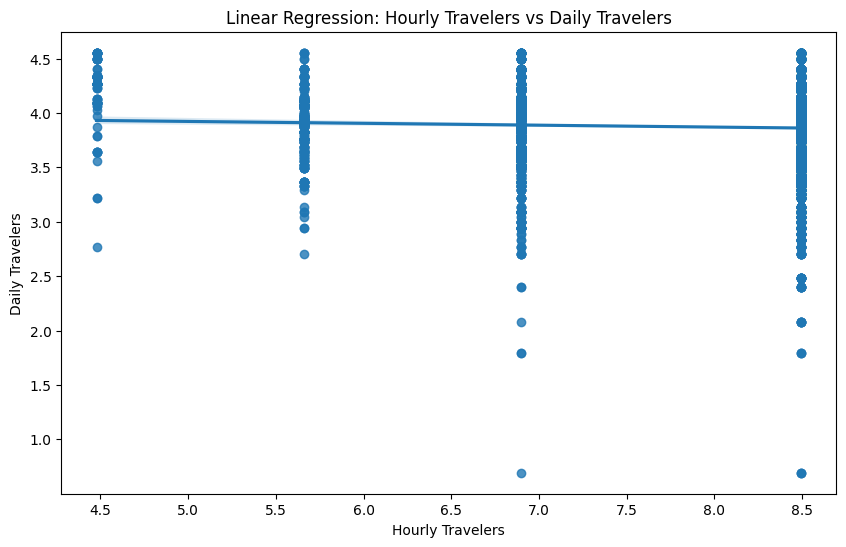

In [74]:
# prompt: Give me liner regression  model graph between hourly travelers vs daily travelers

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='hourly_travelers', y='daily_travelers', data=data)
plt.xlabel('Hourly Travelers')
plt.ylabel('Daily Travelers')
plt.title('Linear Regression: Hourly Travelers vs Daily Travelers')
plt.show()


In [75]:
# from sklearn.preprocessing import StandardScaler
# scaler =StandardScaler()







# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# scaler.fit(X_test)
# X_test = scaler.transform(X_test)

In [76]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)
  # Predicting
  y_pred = reg.predict(X_test)
  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Important features are: \n')
used_cols

Adjust_r2: 0.627470049933573
Train score: 0.6936847617118254
Test score: 0.6319888508805214
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'hour',
 'minute',
 'hourly_travelers',
 'diff_btw_0_1_next_bus',
 'diff_btw_0_1_previous_bus',
 'diff_btw_0_2_next_bus',
 'diff_btw_0_2_previous_bus',
 'diff_btw_0_3_next_bus',
 'diff_btw_0_3_previous_bus',
 'count_trip_per_1min_travel_from',
 'count_trip_per_5min_travel_from',
 'count_trip_per_10min_travel_from',
 'count_trip_per_15min',
 'travel_from_distance',
 'Speed',
 'hod_arrived_date',
 'minute_arrived_date',
 'travel_from_Homa Bay',
 'travel_from_Migori',
 'travel_from_Rongo',
 'day_of_month_5',
 'day_of_month_8']

In [77]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE):  28.25943535004475
Mean Absolute Error (MAE):  3.5277024507169696
Root Mean Squared Error (MSE):  5.31596043533478


In [78]:
import xgboost as xgb
used_cols = [ 'diff_btw_0_1_next_bus','diff_btw_0_2_next_bus','diff_btw_0_2_previous_bus','count_trip_per_5min_travel_from',
             'hod_arrived_date','travel_from_distance','minute_arrived_date','Speed','travel_from_Sirare'
             ]
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ',r2)
print('Adjusted R2: ',adj_r2)

Train score: 0.7552415262721683
Test score: 0.6541371498759749
Mean Squared Error (MSE):  26.029349943385107
Mean Absolute Error (MAE):  3.174423242676154
Root Mean Squared Error (MSE):  5.101896700579609
R2:  0.6541371498759749
Adjusted R2:  0.6526202075508696


In [79]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
# std_slc = StandardScaler()

# pca = decomposition.PCA()

# dec_tree = tree.DecisionTreeRegressor()

In [81]:
# pipe = Pipeline(steps=[('std_slc', std_slc),
#                         ('pca', pca),
#                         ('dec_tree', dec_tree)],verbose=True)

In [82]:
# n_components = list(range(1,X.shape[1]+1,1))
# max_depth = [2,4,6,8,10,12]
# cpp_alpha = [0.01,0.1,1,10,100]

In [83]:
# parameters = dict(pca__n_components=n_components,

#                   dec_tree__max_depth=max_depth)

In [84]:
# reg_GS = GridSearchCV(pipe, parameters)
# reg_GS.fit(X, y)

In [85]:
# print('Best max_depth:', reg_GS.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best Number Of Components:', reg_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(reg_GS.best_estimator_.get_params()['dec_tree'])

In [86]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [87]:
dec_reg =RandomForestRegressor(random_state=0,max_depth=2)

In [88]:
dec_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [89]:
print(dec_reg.score(X_train,y_train))
print(dec_reg.score(X_test,y_test))

0.4257782027622198
0.4166422624684487


In [90]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]
}

In [91]:
params = {"min_child_weight":[10,20],
            'eta': [0.004,0.04,4,40],
            'colsample_bytree':[0.7],
            'max_depth': [7,9,11],

          }

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [94]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [95]:
# reg_GS1 = GridSearchCV(dec_reg, parameters,verbose=1)
# reg_GS1.fit(X, y)

In [96]:
reg_gs.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': 10,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.04}

In [97]:
reg_optimal_model =reg_gs.best_estimator_

In [98]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [99]:
reg_optimal_model.score(X_test,y_test)

0.8004031524674489

In [100]:
reg_optimal_model.score(X_train,y_train)

0.8111023714601833

In [101]:
#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [102]:
r2

0.8004031524674489

In [103]:
adj_r2

0.793903255127962

In [104]:
importances = reg_optimal_model.feature_importances_

In [105]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [106]:
importance_df = pd.DataFrame(importance_dict)

In [107]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [108]:
imp_features = important_features['Feature'].tolist()

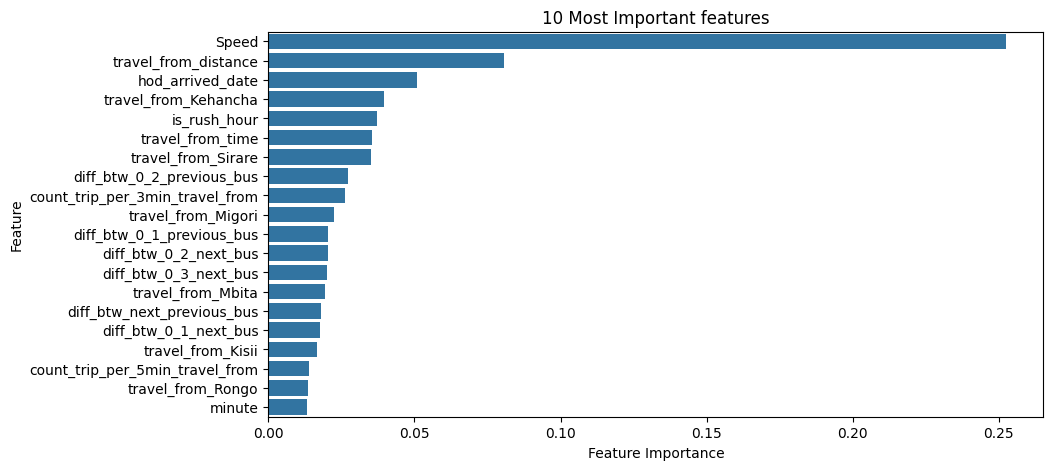

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

In [110]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2)
print('Adjusted R2 Score: ',adj_r2)

Mean Squared Error (MSE):  15.021492450427134
Mean Absolute Error (MAE):  2.523109609703782
Root Mean Squared Error (MSE):  3.875757016432678
R2 Score:  0.8004031524674489
Adjusted R2 Score:  0.793903255127962
